In [ ]:
import math
 
# Пробные данные для уравнения A*X = B
a = [[ 10.8000, 0.0475,      0, 0     ],
     [  0.0321, 9.9000, 0.0523, 0     ],
     [       0, 0.0369, 9.0000, 0.0570],
     [       0,      0, 0.0416, 8.1000]]
 
b = [12.1430, 13.0897, 13.6744, 13.8972]
 
# Решение, которое должно получиться:
# x1 = 1,118587
# x2 = 1,310623
# x3 = 1,503186
# x4 = 1,707983
 
# Вывод матрицы на экран
def print_arr( string, namevec, a ):
    if (type(a) == int) or (type(a) == float):
        print(a)
    else:
        print( string )
        for k in range(len(a)):   
            print("{}[{}] = {:8.4f}".format(namevec, k, a[k]))
            
 
# Проверка 3х-диаг. матрицы коэффициентов на корректность
def isCorrectArray(a):
    n = len(a)
    
    for row in range(0, n):
        if( len(a[row]) != n ):
            print('Не соответствует размерность')
            return False
        
    for row in range(1, n - 1):
        if(abs(a[row][row]) < abs(a[row][row - 1]) + abs(a[row][row + 1])):
            print('Не выполнены условия достаточности')
            return False
 
    if (abs(a[0][0]) < abs(a[0][1]))or(abs(a[n - 1][n - 1]) < abs(a[n - 1][n - 2])):
        print('Не выполнены условия достаточности')
        return False
        
    
    for row in range(0, len(a)):
        if( a[row][row] == 0 ):
            print('Нулевые элементы на главной диагонали')
            return False
    return True
 
 
 
# Процедура нахождения решения 3-х диагональной матрицы
def solution(a, b):
    # if( not isCorrectArray(a) ):
    #     print('Ошибка в исходных данных')
    #     return -1 
 
    n = len(a)
    x = [0 for k in range(0, n)] # обнуление вектора решений
    print('Размерность матрицы: ',n,'x',n)
    
    # Прямой ход
    v = [0 for k in range(0, n)]
    u = [0 for k in range(0, n)]
    # для первой 0-й строки
    v[0] = a[0][1] / (-a[0][0]) 
    u[0] = ( - b[0]) / (-a[0][0]) 
    for i in range(1, n - 1): # заполняем за исключением 1-й и (n-1)-й строк матрицы
        v[i] = a[i][i+1] / ( -a[i][i] - a[i][i-1]*v[i-1] )
        u[i] = ( a[i][i-1]*u[i-1] - b[i] ) / ( -a[i][i] - a[i][i-1]*v[i-1] )
    # для последней (n-1)-й строки
    v[n-1] = 0
    u[n-1] = (a[n-1][n-2]*u[n-2] - b[n-1]) / (-a[n-1][n-1] - a[n-1][n-2]*v[n-2])
    
    # print_arr('Прогоночные коэффициенты v: ','v', v)
    # print_arr('Прогоночные коэффициенты u: ','u', u)
    
    # Обратный ход
    x[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]
        
    return x    
                
    
# MAIN - блок программмы
x = solution(a, b)  # Вызываем процедуру решение
print_arr('Решение: ','x', x)

Размерность матрицы:  4 x 4
Решение: 
x[0] =   1.1186
x[1] =   1.3106
x[2] =   1.5032
x[3] =   1.7080


Размерность матрицы:  51 x 51
Размерность матрицы:  101 x 101
Размерность матрицы:  201 x 201
1
0.04014016920568797
0.020460166094466548
0.06060033530015452
Размерность матрицы:  151 x 151
Размерность матрицы:  301 x 301
Размерность матрицы:  601 x 601
3
0.04261375163015679
0.02136143426788517
0.06397518589804196


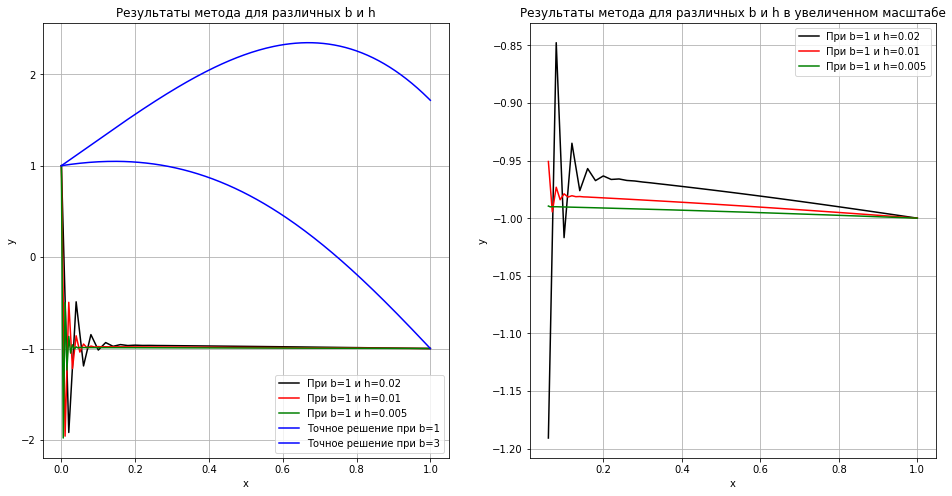

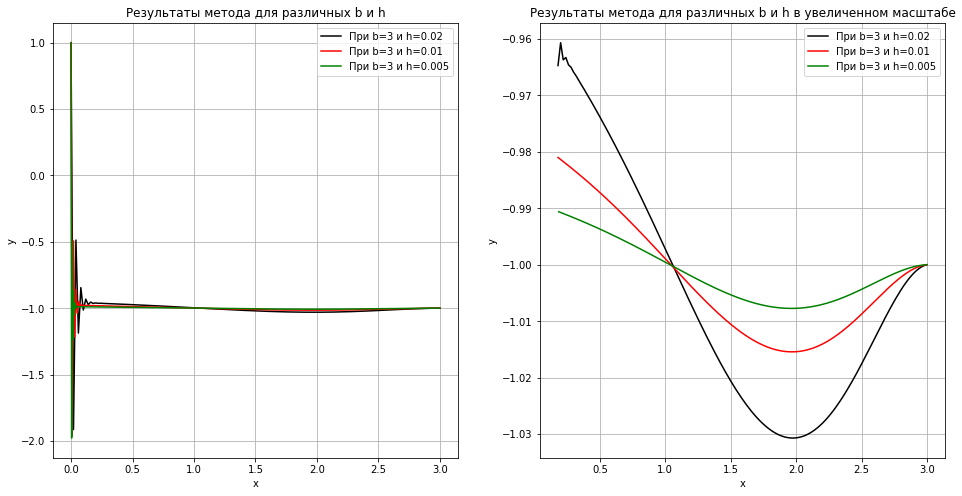

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Given intervals
a = 0
b = [1, 3]
y_0 = 1
y_b = -1
# Given steps
h = [0.02, 0.01, 0.005]
Y = []
X = []

def y_exact(x, const):
  return const*np.exp(x)*np.sin(2*x)-(x*np.exp(x)*np.cos(2*x))/4+np.exp(x)*np.cos(2*x)


for b_el in b:
    y_arrays = []
    x_arrays = []
    length = b_el - a
    for h_el in h:
        N = int(length / h_el)
        # Create matrix of zeros of given size (remember about already given 2 dots)
        A = np.zeros([N + 1, N + 1])

        # Create respective vector of x (remember about already given 2 dots) with a step of h
        x = np.linspace(a, b_el, num=N+1, endpoint=True)

        # Create vector of free coefficients

        d = [y_0] + [pow(h_el, 2) * np.exp(x[k]) * np.sin(2 * x[k]) for k in range(1, len(x)-1)] + [y_b]

        '''
        Straight move
        '''

        # Computing A matrix with 3 diagonals
        # e.g.
        # 1 0 0 0 0
        # 1 2 1 0 0
        # 0 1 5 1 0
        # 0 0 1 8 1
        # 0 0 0 0 1

        for i in range(N + 1):
            for j in range(N + 1):
                if i == j == 0 or i == j == N:
                    A[i][j] = 1
                elif i == j != 0 or i == j != N:
                    A[i][j] = 1 + h_el
                    A[i][j - 1] = 1 - h_el
                    A[i][j + 1] = 5 * pow(h_el, 2) - 2

        # Now everything resembles us of A*y = b
        # So let's find out y vector
        
        '''
        Reverse move
        '''

        # Let's just solve the system A*y = d with the help of gorgeous mother np.linalg.solve   :D
        # y = np.linalg.solve(A, d)
        y = solution(A, d)
        y_arrays.append(y)

        x_arrays.append(x)
    Y.append(y_arrays)
    X.append(x_arrays)

    fig1 = plt.figure(figsize=(16, 8))
    ax1 = fig1.add_subplot(1, 2, 1)
    print(b_el)
    print(max([abs(y_arrays[0][c] - y_arrays[1][c]) for c in range(len(y_arrays[0]))]))
    print(max([abs(y_arrays[1][c] - y_arrays[2][c]) for c in range(len(y_arrays[1]))]))
    print(max([abs(y_arrays[0][c] - y_arrays[2][c]) for c in range(len(y_arrays[0]))]))
    ax1.set_title("Результаты метода для различных b и h")
    ax1.plot(x_arrays[0], y_arrays[0], 'k',
             label=rf"При b={b_el} и h={h[0]}")
    ax1.plot(x_arrays[1], y_arrays[1], 'r',
             label=rf"При b={b_el} и h={h[1]}")
    ax1.plot(x_arrays[2], y_arrays[2], 'g',
             label=rf"При b={b_el} и h={h[2]}")
    
    if b_el != 3:
      ax1.plot(x_arrays[2], [y_exact(x, 1.0372711674859043) for x in x_arrays[2]], 'b',
              label=rf"Точное решение при b=1")
      ax1.plot(x_arrays[2], [y_exact(x, -0.061332312305967675) for x in x_arrays[2]], 'b',
              label=rf"Точное решение при b=3")

    ax1.set_ylabel('y')
    ax1.set_xlabel('x')
    ax1.grid(True)
    ax1.legend()
    ax1 = fig1.add_subplot(1, 2, 2)
    ax1.set_title("Результаты метода для различных b и h в увеличенном масштабе")
    ax1.plot(x_arrays[0][int(len(x_arrays[0])/16):], y_arrays[0][int(len(y_arrays[0])/16):], 'k',
             label=rf"При b={b_el} и h={h[0]}")
    ax1.plot(x_arrays[1][int(len(x_arrays[1])/16):], y_arrays[1][int(len(y_arrays[1])/16):], 'r',
             label=rf"При b={b_el} и h={h[1]}")
    ax1.plot(x_arrays[2][int(len(x_arrays[2])/16):], y_arrays[2][int(len(y_arrays[2])/16):], 'g',
             label=rf"При b={b_el} и h={h[2]}")

    ax1.set_ylabel('y')
    ax1.set_xlabel('x')
    ax1.grid(True)
    ax1.legend()



In [ ]:
c1 = -(1+3*np.exp(1)*np.cos(2)/4)/(np.exp(1)*np.sin(2))
print(c1)
c1 = -(1+np.exp(3)*np.cos(6)/4)/(np.exp(3)*np.sin(6))
print(c1)

-0.061332312305967675
1.0372711674859043
